In [ ]:
#Connecting to G Drive
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/MyDrive/ColabNotebooks/PredictiveModelling/data/

Mounted at /gdrive
/gdrive/MyDrive/PredictiveModelling/data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

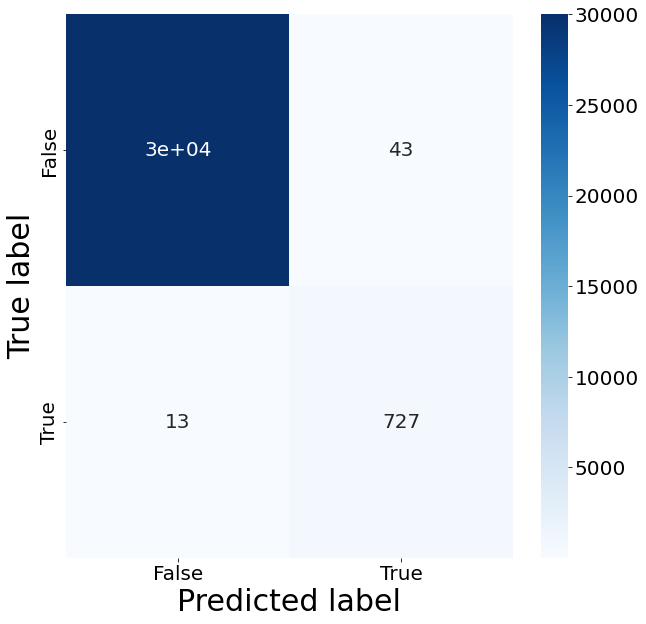

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)

SMALL_SIZE = 30
MEDIUM_SIZE = 30
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

cm = [[30012,43],[13,727]]

sns.heatmap(cm, annot=True, cmap='Blues', fmt='.3g', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
simulation_data_df = pd.read_csv('simulation_data.csv', index_col='Unnamed: 0')

simulation_data_df['pos_ratio_smooth'] = simulation_data_df['pos_ratio'].rolling(3, center=True, min_periods=1).mean()
simulation_data_df['false_pos_rate_smooth'] = simulation_data_df['false_pos_rate'].rolling(3, center=True, min_periods=1).mean()


In [ ]:
simulation_data_df.head()

,week,number_training,precision,recall,fscore,confusion_matrix,pos_ratio,false_pos_rate,pos_ratio_smooth,false_pos_rate_smooth
0,Week 2,162,0.956275,0.961326,0.957626,[[170 2]\n [ 5 4]],0.500000,0.555556,0.406250,0.377778
1,Week 3,347,0.953267,0.952128,0.952640,[[163 5]\n [ 4 16]],0.312500,0.200000,0.604167,0.328775
2,Week 4,532,0.950667,0.933333,0.939750,[[172 10]\n [ 3 10]],1.000000,0.230769,0.580357,0.339668
3,Week 5,703,0.923744,0.932642,0.924568,[[173 3]\n [ 10 7]],0.428571,0.588235,0.726190,0.384113
4,Week 6,874,0.976258,0.974093,0.975055,[[184 3]\n [ 2 4]],0.750000,0.333333,0.416667,0.366013


In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

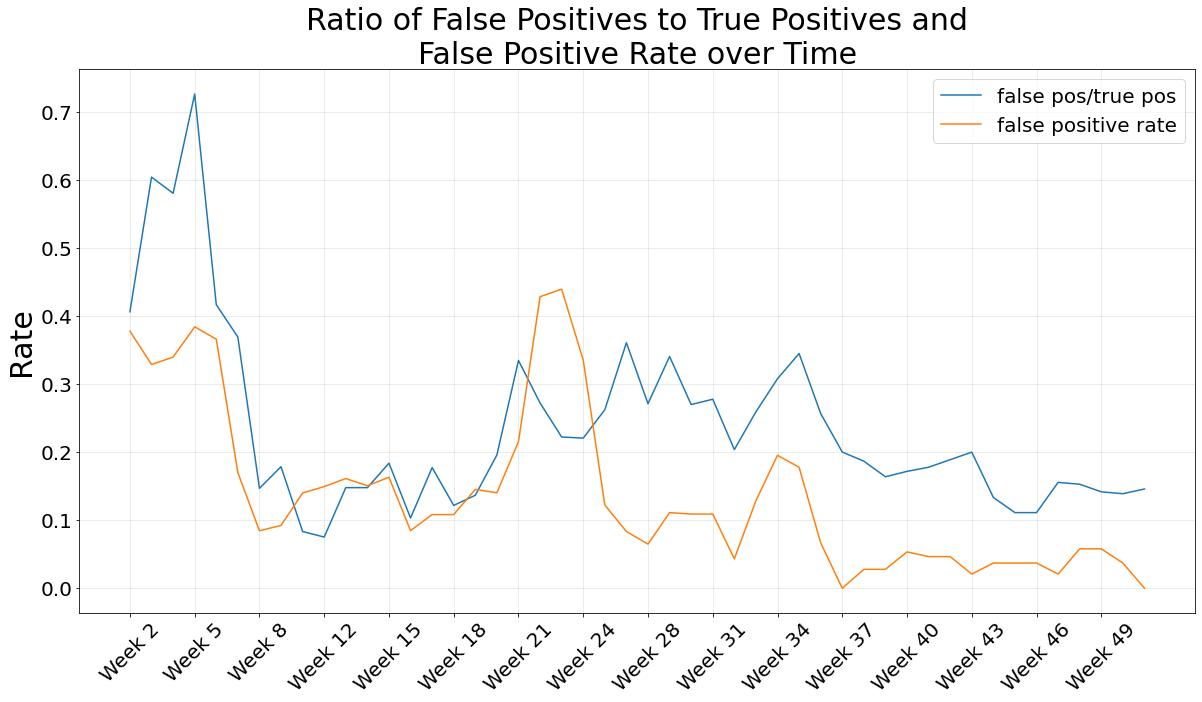

In [ ]:
plt.plot(simulation_data_df["week"],simulation_data_df['pos_ratio_smooth'], label='false pos/true pos')
plt.plot(simulation_data_df["week"],simulation_data_df['false_pos_rate_smooth'], label='false positive rate')

plt.title('Ratio of False Positives to True Positives and\nFalse Positive Rate over Time')
plt.ylabel('Rate')
plt.xticks(simulation_data_df["week"][::3], rotation = 45)
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")

plt.show()

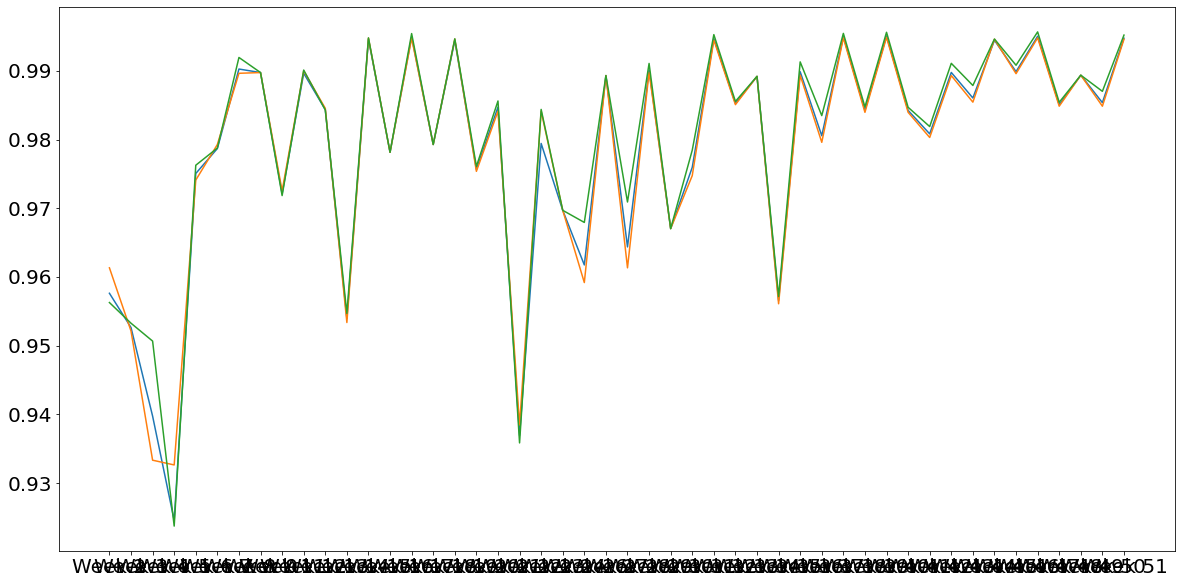

In [ ]:
plt.plot(simulation_data_df["week"],simulation_data_df['fscore'], label='fscore')
plt.plot(simulation_data_df["week"],simulation_data_df['recall'], label='recall')
plt.plot(simulation_data_df["week"],simulation_data_df['precision'], label='precision')
plt.show()